In [1]:
# Data preprocessing

import csv
from hypothesis_test import *
from kardis_test import *
from mg_calculator import *
from q_finder import *
from graph_distributions import *

file = open(r"Datasets/compas.csv", mode='r', encoding='utf-8-sig')
csvreader = csv.reader(file)
rowlist = [row for row in csvreader]
for category in rowlist[0]:
    index = rowlist[0].index(category)
    exec(category + " = [row[index] for row in rowlist[1:]]")
file.close()

recid_scores = [score_text[x] for x in range(1,len(score_text), 3)]
recid_names = [first[x] + " " + last[x] for x in range(1, len(first), 3)]

file = open(r"Datasets/people.csv", mode='r', encoding='utf-8-sig')
csvreader = csv.reader(file)
rowlist = [row for row in csvreader]
for category in rowlist[0]:
    index = rowlist[0].index(category)
    exec(category + " = [row[index] for row in rowlist[1:]]")
file.close()

recid_races = [race[name.index(x)] for x in recid_names]

Null hypothesis (proposed distribution): [0.11513157894736842, 0.22767857142857142, 0.6571898496240601]

Proposed distribution rejected at alpha = 0.05. Kardis = 8.26624811713273e-449.
Any plausible distribution must boost probability over the given distribution by 6.04869334811876e+446, and will therefore have a minimum probability of 1.95155827749904e-10.
Closest plausible distribution: [0.2725547521078525, 0.29216564417244767, 0.43527960371969987]


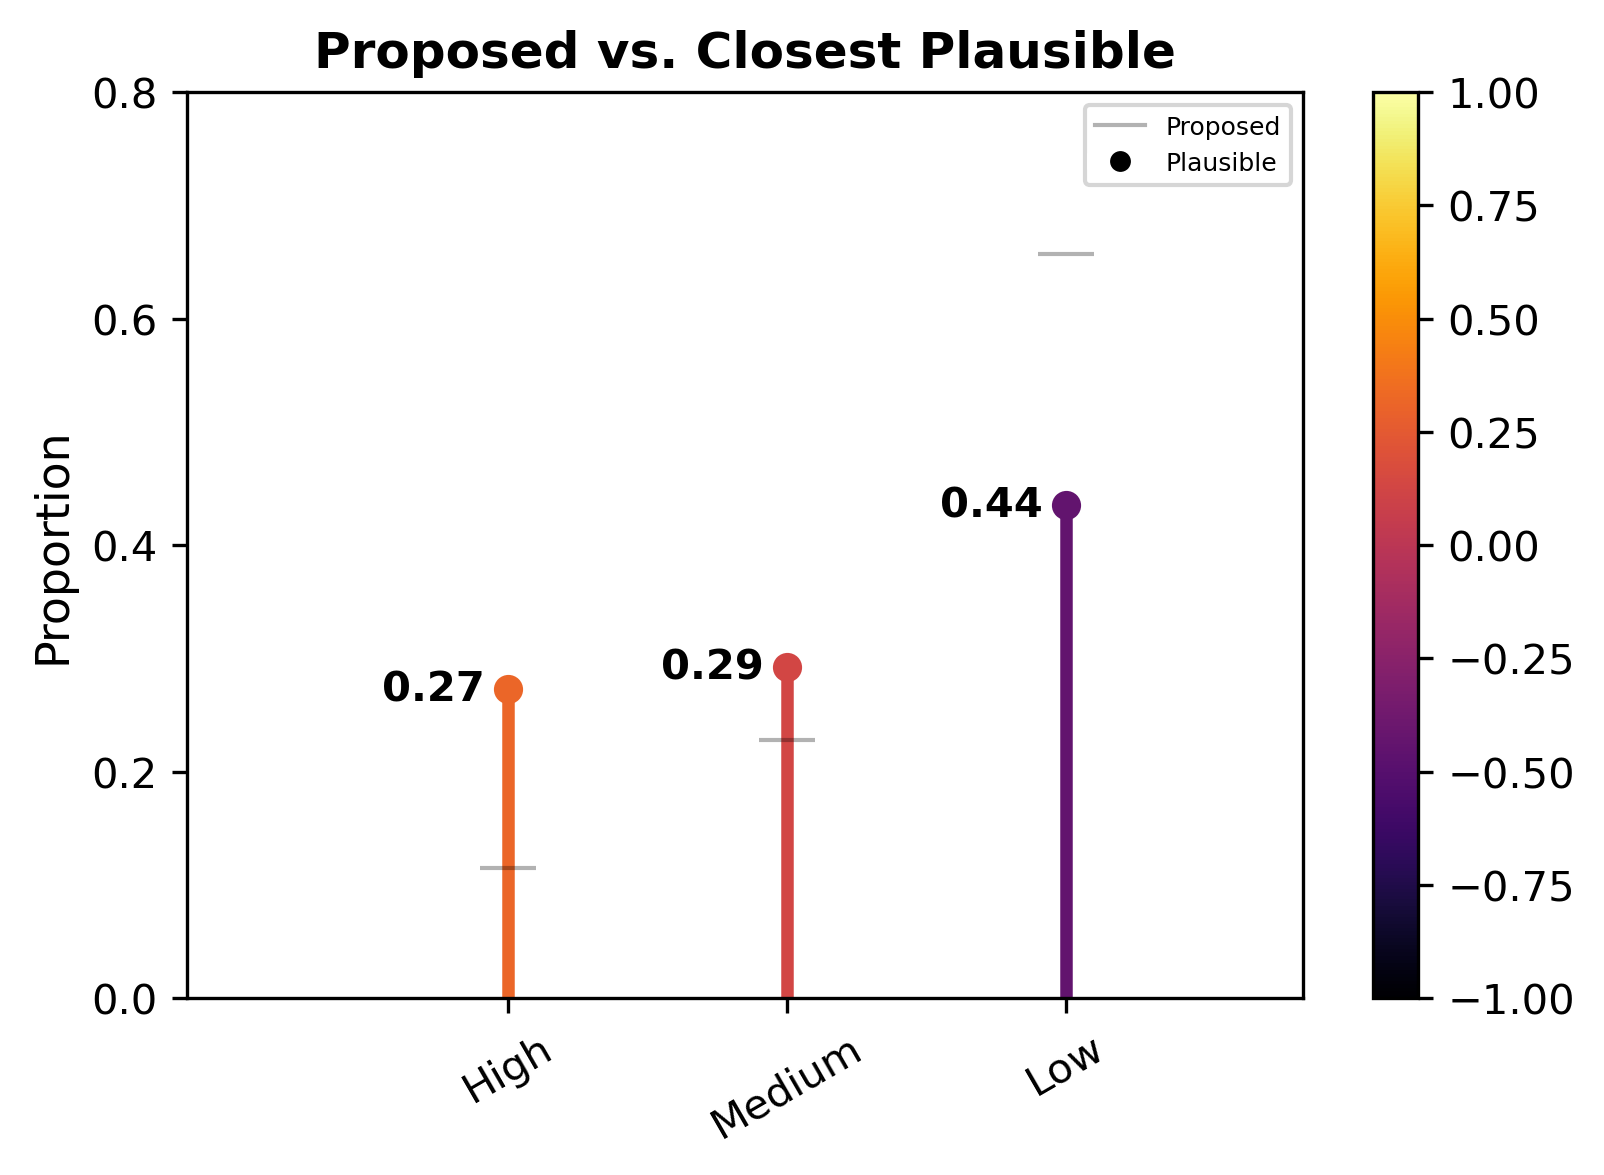

<Figure size 432x288 with 0 Axes>

In [2]:
# Setup and Experiments
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(recid_races,recid_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]
AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")
q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_recid_white_dist.pdf")

Null hypothesis (proposed distribution): [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

Proposed distribution rejected at alpha = 0.05. Kardis = 9.61313370800529e-28.
Any plausible distribution must boost probability over the given distribution by 5.20121757573836e+25, and will therefore have a minimum probability of 1.45331124279728e-10.
Closest plausible distribution: [0.3132110179704111, 0.31275006256609067, 0.3740389194634983]


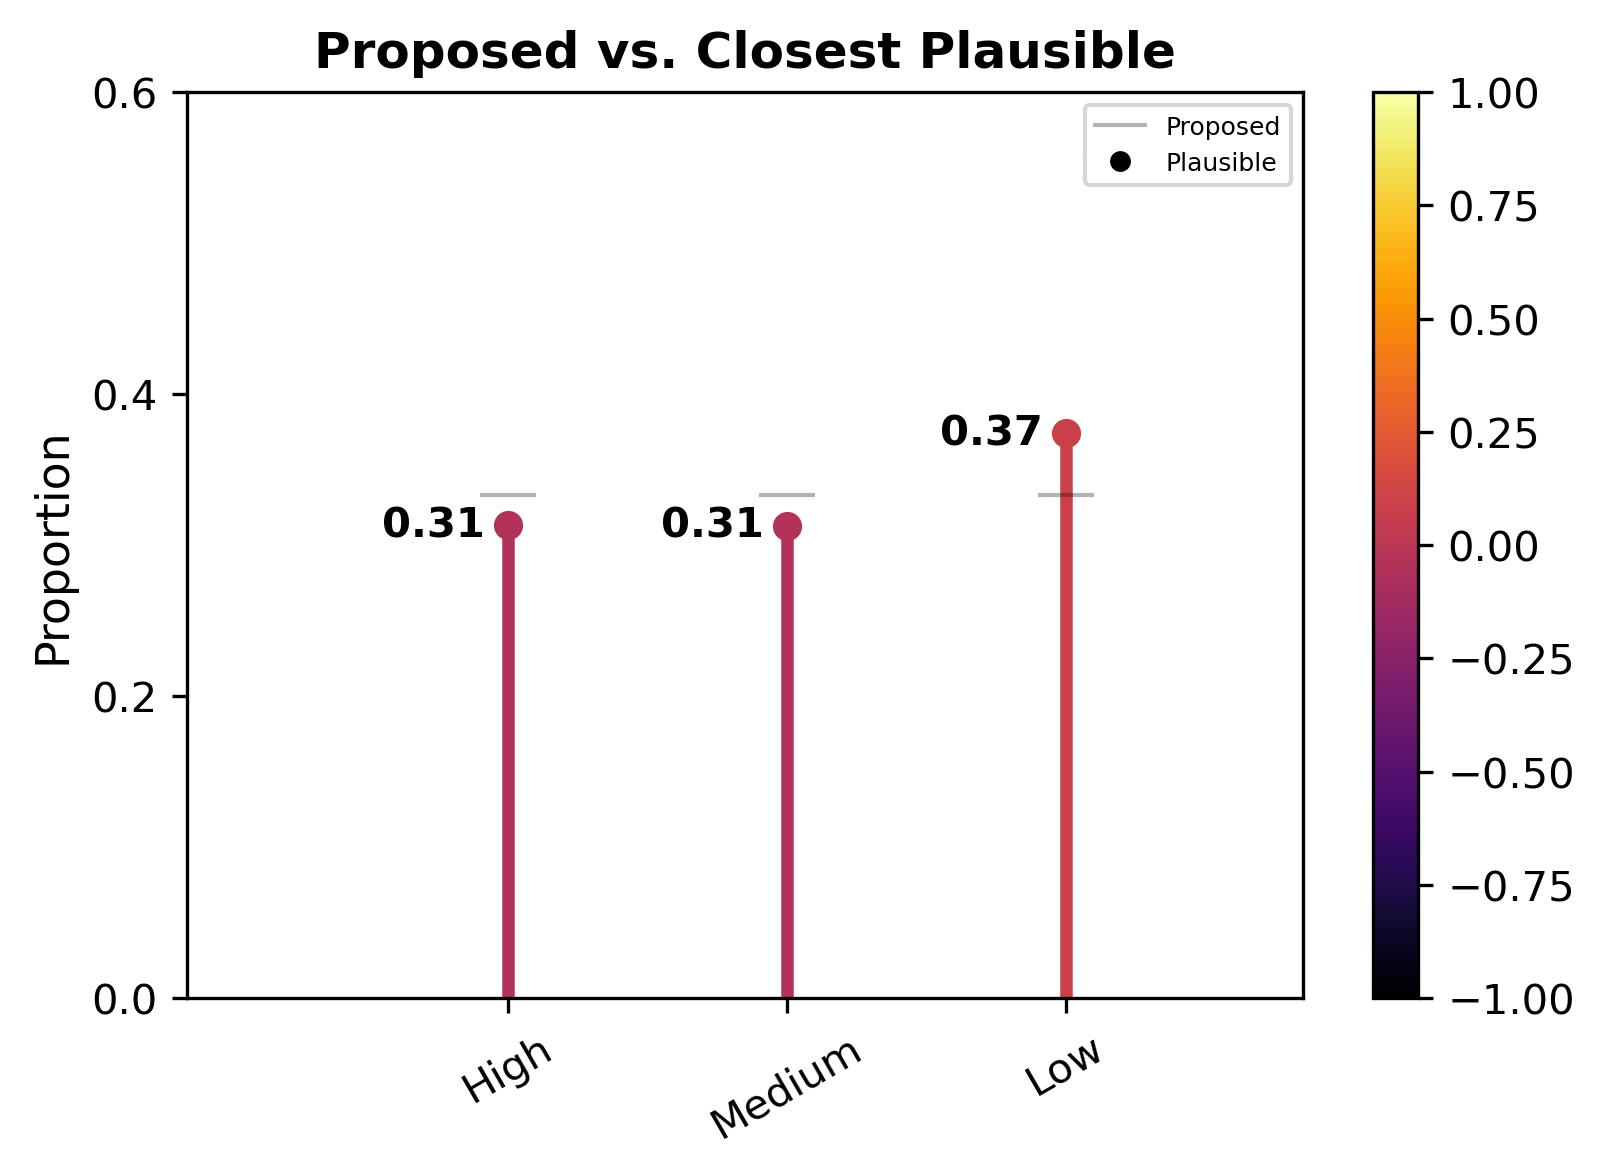

<Figure size 432x288 with 0 Axes>

In [3]:
print("Null hypothesis (proposed distribution): " + str(3*[1/3]) + "\n")

q_uni = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')])[4]

graph_distributions(q_uni,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=3*[1/3], filename=r"Results/compas_AA_recid_uniform_dist.pdf")